# O que vende um carro?

Você é analista na Lista de Eixo de Manivela. Centenas de propagandas gratuitas de veículos são publicadas no seu site todos os dias. Você precisa estudar os dados coletados nos últimos anos e determinar quais fatores influenciaram o preço de um veículo.

## Iniciação

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Carregue dados

In [2]:
# Carregue o arquivo com os dados em um DataFrame

us_car = pd.read_csv('/datasets/vehicles_us.csv')



### Explore os dados iniciais

O conjunto de dados contém os seguintes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel etc.
- `odometer` — a quilometragem do veículo quando a propaganda foi publicada 
- `transmission`
- `paint_color`
- `is_4wd` — Se o veículo é 4 por 4 (tipo Booleano)
- `date_posted` — a data que a propaganda foi publicada
- `days_listed` — dias desde a publicação até a retirada



In [3]:
# imprima as informações gerais/resumidas sobre o DataFrame

print(us_car.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
None


In [4]:
# imprima uma amostragem dos dados

print(us_car.head(10))

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
5  14990      2014.0    chrysler 300  excellent        6.0  gas   57954.0   
6  12990      2015.0    toyota camry  excellent        4.0  gas   79212.0   
7  15990      2013.0     honda pilot  excellent        6.0  gas  109473.0   
8  11500      2012.0     kia sorento  excellent        4.0  gas  104174.0   
9   9200      2008.0     honda pilot  excellent        NaN  gas  147191.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automat

** Podemos ver algumas informacoes faltantes e NAN. 

- `paint_color   42258`

- `model_year    47906`
- `cylinders     46265` 
- `odometer      43633`
- `is_4wd        25572`

- `NAN


### Conclusões e próximos passos

## Cuide dos valores ausentes (se houver algum)

In [5]:
us_car.convert_dtypes

<bound method NDFrame.convert_dtypes of        price  model_year           model  condition  cylinders fuel  odometer  \
0       9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1      25500         NaN      ford f-150       good        6.0  gas   88705.0   
2       5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3       1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4      14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
...      ...         ...             ...        ...        ...  ...       ...   
51520   9249      2013.0   nissan maxima   like new        6.0  gas   88136.0   
51521   2700      2002.0     honda civic    salvage        4.0  gas  181500.0   
51522   3950      2009.0  hyundai sonata  excellent        4.0  gas  128000.0   
51523   7455      2013.0  toyota corolla       good        4.0  gas  139573.0   
51524   6300      2014.0   nissan altima       good        4.0  gas  

In [6]:
#Vamos analisar detalhadamente as colunas mencionadas acima:
print(us_car['paint_color'].value_counts(dropna=False))

print(us_car['model_year'].value_counts(dropna=False))

white     10029
NaN        9267
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64
NaN       3619
2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
          ... 
1948.0       1
1949.0       1
1954.0       1
1936.0       1
1961.0       1
Name: model_year, Length: 69, dtype: int64


In [7]:
df = pd.DataFrame(us_car)
print(df.dropna(axis=0, how='all'))

       price  model_year           model  condition  cylinders fuel  odometer  \
0       9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1      25500         NaN      ford f-150       good        6.0  gas   88705.0   
2       5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3       1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4      14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
...      ...         ...             ...        ...        ...  ...       ...   
51520   9249      2013.0   nissan maxima   like new        6.0  gas   88136.0   
51521   2700      2002.0     honda civic    salvage        4.0  gas  181500.0   
51522   3950      2009.0  hyundai sonata  excellent        4.0  gas  128000.0   
51523   7455      2013.0  toyota corolla       good        4.0  gas  139573.0   
51524   6300      2014.0   nissan altima       good        4.0  gas       NaN   

      transmission    type 

In [8]:
## PAINT_COLOR
us_car['paint_color'] = us_car['paint_color'].fillna('Unknow')

print(us_car['paint_color'].value_counts(dropna=False))

white     10029
Unknow     9267
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64


In [9]:

print(us_car['cylinders'].value_counts(dropna=False))

print(us_car['odometer'].value_counts(dropna=False))

print(us_car['is_4wd'].value_counts(dropna=False))

8.0     15844
6.0     15700
4.0     13864
NaN      5260
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64
NaN         7892
0.0          185
140000.0     183
120000.0     179
130000.0     178
            ... 
280499.0       1
49814.0        1
194920.0       1
140800.0       1
269527.0       1
Name: odometer, Length: 17763, dtype: int64
NaN    25953
1.0    25572
Name: is_4wd, dtype: int64


## Corrija os tipos de dados

[Como os dados estão mais ou menos completos agora, corrija os tipos de dados se necessário.]

In [10]:
## Nesta sessao utilizaremos o entendimento de que para 1= a sim , 0=nao

us_car['is_4wd'] = us_car['is_4wd'].fillna('nao')

us_car['is_4wd'] = us_car['is_4wd'].replace(1,"sim")

print(us_car['is_4wd'].value_counts(dropna=False))

nao    25953
sim    25572
Name: is_4wd, dtype: int64


In [11]:
us_car['is_4wd'] = us_car['is_4wd'].astype(str)
print(us_car['is_4wd'])

0        sim
1        sim
2        nao
3        nao
4        nao
        ... 
51520    nao
51521    nao
51522    nao
51523    nao
51524    nao
Name: is_4wd, Length: 51525, dtype: object


## Enriqueça os dados

In [12]:
# Adicione valores data/hora para quando a propaganda estiver colocada
us_car['date_posted'] = pd.to_datetime(us_car['date_posted'], format = "%Y-%m-%d")

print(us_car['date_posted'])

0       2018-06-23
1       2018-10-19
2       2019-02-07
3       2019-03-22
4       2019-04-02
           ...    
51520   2018-10-03
51521   2018-11-14
51522   2018-11-15
51523   2018-07-02
51524   2018-06-05
Name: date_posted, Length: 51525, dtype: datetime64[ns]


In [13]:
#Recuperar o ano para incluirmos na nossa coluna recem criada.
us_car['year_posted'] = us_car['date_posted'].dt.year
print(us_car['year_posted'])

0        2018
1        2018
2        2019
3        2019
4        2019
         ... 
51520    2018
51521    2018
51522    2018
51523    2018
51524    2018
Name: year_posted, Length: 51525, dtype: int64


In [14]:
# Adicione a idade do veículo quando a propaganda for colocada

us_car['total_year_car'] = (us_car['year_posted'] - us_car['model_year'])

print(us_car['total_year_car'])


0         7.0
1         NaN
2         6.0
3        16.0
4         2.0
         ... 
51520     5.0
51521    16.0
51522     9.0
51523     5.0
51524     4.0
Name: total_year_car, Length: 51525, dtype: float64


In [15]:
print(us_car['total_year_car'].value_counts())

5.0     3524
7.0     3467
4.0     3456
6.0     3440
3.0     3169
        ... 
63.0       1
89.0       1
43.0       1
59.0       1
65.0       1
Name: total_year_car, Length: 68, dtype: int64


In [16]:
# Adicione a quilometragem média por ano
# Vamos utilizar o total_year_car calculado acima e dividir pelo odometer para obtermos a media por ano
# Para calcular o odometer
# arredondar utilizando around

us_car['mean_km_year'] = (us_car['odometer'] / us_car['total_year_car']).round(0)

print(us_car['mean_km_year'])


0        20714.0
1            NaN
2        18333.0
3            NaN
4        40452.0
          ...   
51520    17627.0
51521    11344.0
51522    14222.0
51523    27915.0
51524        NaN
Name: mean_km_year, Length: 51525, dtype: float64


## Verifique os dados limpos

In [17]:
# imprima as informações gerais/resumidas sobre o DataFrame

print(us_car.info(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           51525 non-null  int64         
 1   model_year      47906 non-null  float64       
 2   model           51525 non-null  object        
 3   condition       51525 non-null  object        
 4   cylinders       46265 non-null  float64       
 5   fuel            51525 non-null  object        
 6   odometer        43633 non-null  float64       
 7   transmission    51525 non-null  object        
 8   type            51525 non-null  object        
 9   paint_color     51525 non-null  object        
 10  is_4wd          51525 non-null  object        
 11  date_posted     51525 non-null  datetime64[ns]
 12  days_listed     51525 non-null  int64         
 13  year_posted     51525 non-null  int64         
 14  total_year_car  47906 non-null  float64       
 15  me

In [18]:
# imprima uma amostragem dos dados

print(us_car.describe().dropna())

              price   model_year     cylinders       odometer  days_listed  \
count   51525.00000  47906.00000  46265.000000   43633.000000  51525.00000   
mean    12132.46492   2009.75047      6.125235  115553.461738     39.55476   
min         1.00000   1908.00000      3.000000       0.000000      0.00000   
25%      5000.00000   2006.00000      4.000000   70000.000000     19.00000   
50%      9000.00000   2011.00000      6.000000  113000.000000     33.00000   
75%     16839.00000   2014.00000      8.000000  155000.000000     53.00000   
max    375000.00000   2019.00000     12.000000  990000.000000    271.00000   

        year_posted  total_year_car  mean_km_year  
count  51525.000000    47906.000000       40561.0  
mean    2018.307462        8.556966           inf  
min     2018.000000        0.000000           0.0  
25%     2018.000000        4.000000       10797.0  
50%     2018.000000        7.000000       15388.0  
75%     2019.000000       12.000000       22692.0  
max     201

In [19]:
print(us_car.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           51525 non-null  int64         
 1   model_year      47906 non-null  float64       
 2   model           51525 non-null  object        
 3   condition       51525 non-null  object        
 4   cylinders       46265 non-null  float64       
 5   fuel            51525 non-null  object        
 6   odometer        43633 non-null  float64       
 7   transmission    51525 non-null  object        
 8   type            51525 non-null  object        
 9   paint_color     51525 non-null  object        
 10  is_4wd          51525 non-null  object        
 11  date_posted     51525 non-null  datetime64[ns]
 12  days_listed     51525 non-null  int64         
 13  year_posted     51525 non-null  int64         
 14  total_year_car  47906 non-null  float64       
 15  me

In [20]:
us_car['model_rename'] = us_car['model'].replace(
   {
    'ford f-150':'ford f150',
    'toyota camry': 'toyota camry',
    'chevrolet silverado': 'chevrolet silverado 1500',
    'toyota camry le': 'toyota camry',
    'ford f-250 sd': 'ford f250',
    'chevrolet silverado 1500 crew' : 'chevrolet silverado 1500',
    'ford f250 super duty': 'ford f250',
    'ford f150':'ford f150',
    'ford f-250' : 'ford f250',
    'ford f-350 sd': 'ford f350',
    'ford f-250 super duty' :'ford f250',
    'gmc sierra 2500hd':'gmc sierra 2500',
    'ford f350 super duty': 'ford f350',
    'chevrolet silverado 2500':  'chevrolet silverado 2500',
    'ford f-250': 'ford f250',
    'ford f150 supercrew cab xlt': 'ford f150',
    'chevrolet silverado 2500hd':'chevrolet silverado 2500',
    'ford f-350':'ford f350',
    'chevrolet silverado 3500hd':'chevrolet silverado 3500'
       
}
)
print(us_car['model_rename'].unique())

['bmw x5' 'ford f150' 'hyundai sonata' 'chrysler 200' 'chrysler 300'
 'toyota camry' 'honda pilot' 'kia sorento' 'chevrolet silverado 1500'
 'honda accord' 'ram 1500' 'gmc yukon' 'jeep cherokee'
 'chevrolet traverse' 'hyundai elantra' 'chevrolet tahoe' 'toyota rav4'
 'jeep wrangler' 'chevrolet malibu' 'ford fusion se' 'chevrolet impala'
 'chevrolet corvette' 'jeep liberty' 'nissan altima' 'subaru outback'
 'toyota highlander' 'dodge charger' 'toyota tacoma' 'chevrolet equinox'
 'nissan rogue' 'mercedes-benz benze sprinter 2500' 'honda cr-v'
 'jeep grand cherokee' 'toyota 4runner' 'ford focus' 'honda civic'
 'kia soul' 'chevrolet colorado' 'chevrolet camaro lt coupe 2d'
 'chevrolet cruze' 'ford mustang' 'chevrolet silverado 3500'
 'nissan frontier crew cab sv' 'subaru impreza'
 'jeep grand cherokee laredo' 'nissan versa' 'ford f250'
 'chevrolet camaro' 'ford mustang gt coupe 2d' 'subaru forester'
 'ford explorer' 'ford f350' 'ford edge' 'nissan maxima' 'nissan sentra'
 'chevrolet suburb

In [21]:
us_car['model_rename']

print(us_car['model_rename'].value_counts().head(60))

chevrolet silverado 1500       3745
ford f150                      3653
ford f250                      1798
ram 1500                       1750
toyota camry                   1306
jeep wrangler                  1119
ram 2500                       1091
honda accord                    964
chevrolet silverado 2500        915
gmc sierra 1500                 906
ford explorer                   847
ford escape                     841
toyota tacoma                   827
honda civic                     815
nissan altima                   813
jeep grand cherokee             806
ford f350                       791
ford focus                      754
chevrolet tahoe                 713
honda cr-v                      685
ford mustang                    681
chevrolet impala                674
toyota corolla                  650
chevrolet malibu                617
toyota tundra                   603
dodge grand caravan             598
chevrolet equinox               591
chevrolet suburban          

## Estude os parâmetros fundamentais

Os parâmetros são:

- Preço
- A idade do veículo quando a propaganda foi colocada
- Quilometragem
- Número de cilindros
- Condição

In [22]:
# Lembre-se do objetivo do curso : Entender quais os fatores influenciam o preco do produto.


<AxesSubplot:ylabel='Frequency'>

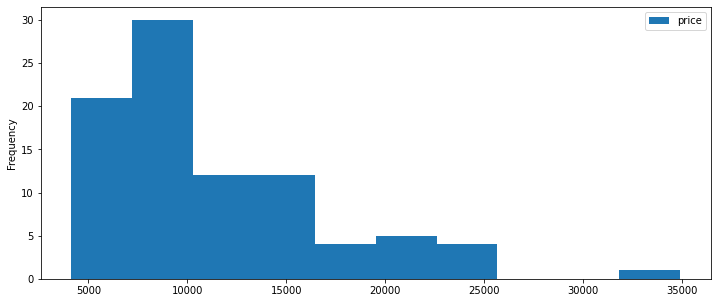

In [23]:
# Price
(us_car
     .pivot_table(index ='model_rename' , values = 'price')
     .plot(kind= 'hist', figsize=(12,5))

)

count    47906.000000
mean         8.556966
std          6.295266
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: total_year_car, dtype: float64

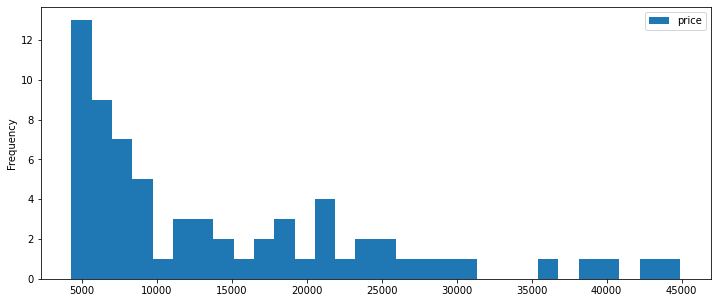

In [24]:
# total_year_car

(us_car
     .pivot_table(index ='total_year_car' , values = 'price')
     .plot(kind= 'hist', bins =30,  figsize=(12,5))
)
us_car['total_year_car'].describe()

<AxesSubplot:ylabel='Frequency'>

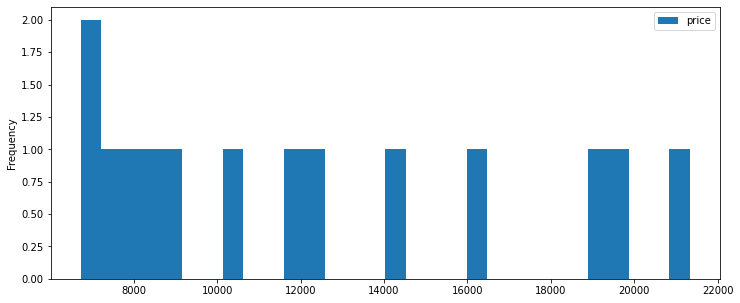

In [25]:
(us_car
     .query('total_year_car > 0 and total_year_car < 15')
     .pivot_table(index ='total_year_car' , values = 'price')
     .plot(kind= 'hist',bins=30, figsize=(12,5))
)


<AxesSubplot:ylabel='Frequency'>

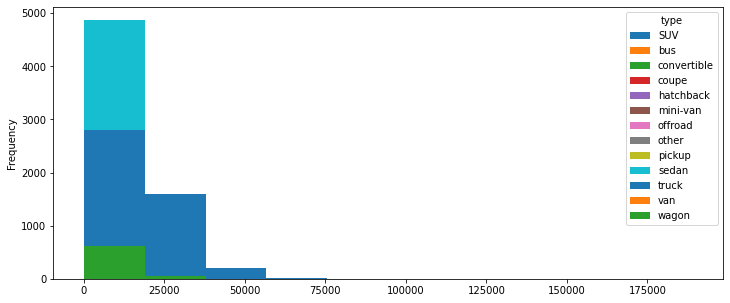

In [26]:
# odometer
(us_car

     .pivot_table(columns='type',index='odometer', values = 'price',dropna=True)
     .plot(kind= 'hist', figsize=(12,5))
)


<AxesSubplot:ylabel='Frequency'>

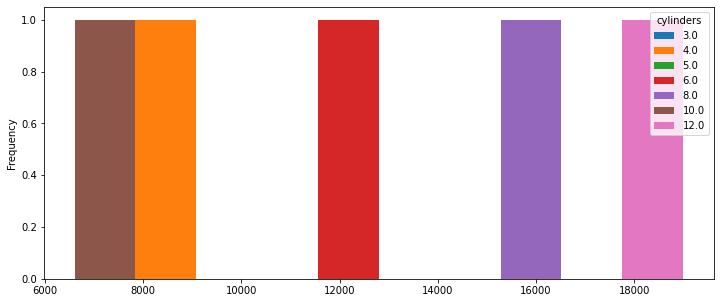

In [27]:
# cylinders
(us_car
     .pivot_table(columns ='cylinders' , values = 'price',dropna=True)
     .plot(kind= 'hist', figsize=(12,5))
)


<AxesSubplot:ylabel='Frequency'>

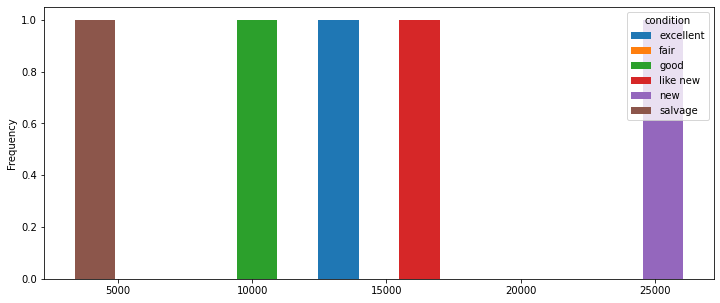

In [28]:
# condition
(us_car
     .pivot_table(columns ='condition', values = 'price',dropna=True)
     .plot(kind= 'hist', bins=15,figsize=(12,5))
)                            

## Estude e cuide dos valores ausentes

[Dado os resultados acima, determine quais colunas devem conter valores atípicos, e crie um DataFrame sem aqueles valores atípicos. Dica: Valores atípicos podem ser identificados se você definir os limites inferior/superior para intervalos normais de valores.]

<AxesSubplot:ylabel='Frequency'>

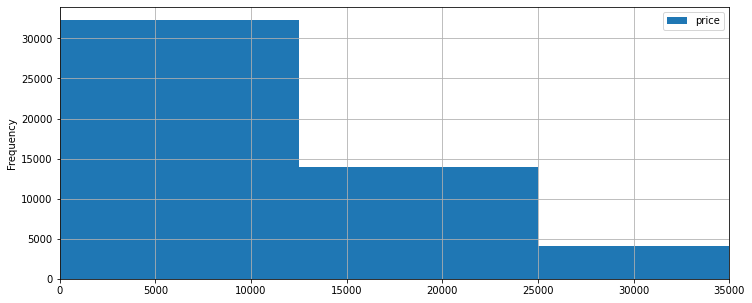

In [29]:
# Determine o limite inferior para valores atípicos
# Determine o limite superior para valores atípicos

# Price
(us_car
     #.pivot_table(index ='model_rename' , values = 'price',aggfunc=['mean','median'])
     .plot(kind= 'hist',y='price',bins=30,xlim=(0,35000) ,grid = True, figsize=(12,5))

)

<AxesSubplot:ylabel='Frequency'>

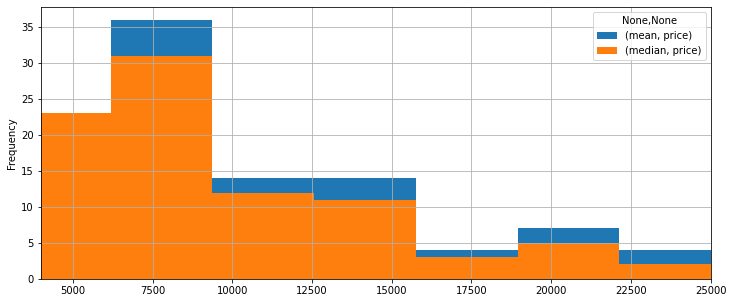

In [30]:
(us_car
     .pivot_table(index ='model_rename' , values = 'price',aggfunc=['mean','median'])
     .plot(kind= 'hist',xlim=(4000,25000), grid = True, figsize=(12,5))

)

## Estude os parâmetros fundamentais sem valores atípicos

## Tempo de vida das propagandas

[Estude quantos dias propagandas foram exibidas (`days_listed`). Calcule a média e a mediana. Descreva o tempo de vida útil comum de uma propaganda. Determine quando as propagandas foram removidas rapidamente, e quando elas foram listadas por um tempo anormalmente longo.]

In [32]:
us_car['days_listed'].describe()



count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

## Conclusåo:
- `Na media os carros ficaram postados por 40 dias, ao se considerar a mediana, encontraremos o total de 28 dias.
Isso ocorre pois excluimos os extremos ao realizar o calculo da mediana.`


## Média de preços por cada tipo de veículo

[Analise o número de propagandas e o preço médio para cada tipo de veículo. Construa um gráfico mostrando a dependência do número de propagandas em relação ao tipo de veículo. Selecione os dois tipos com os maiores números de propagandas.]

<AxesSubplot:ylabel='Frequency'>

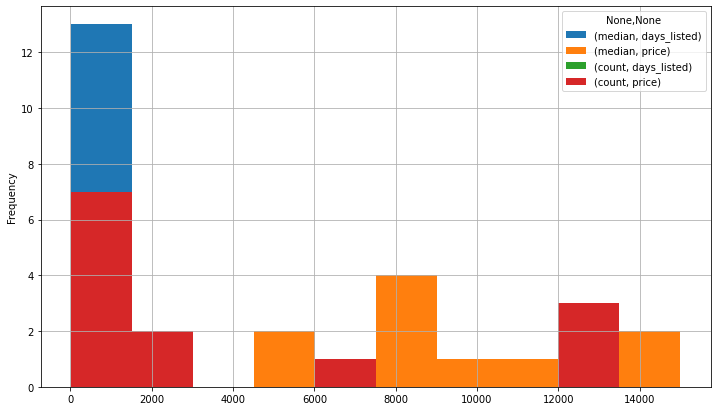

In [37]:
(us_car
     .pivot_table(values =['days_listed','price'],index ='type', aggfunc=['median','count'])
     .round(0)
     .sort_values(by='type',ascending=False)
     .plot(kind='hist',grid=True, figsize=(12,7))
)


<AxesSubplot:ylabel='Frequency'>

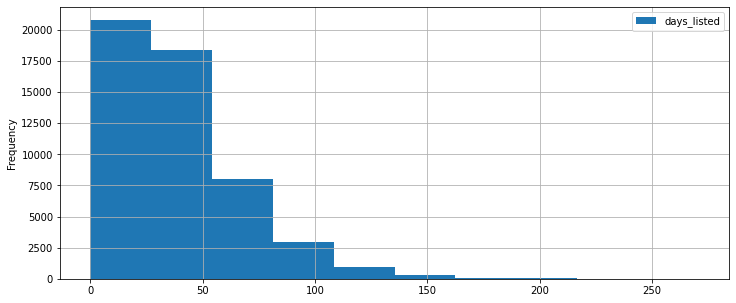

In [36]:
(us_car
    .query('price > 0')
    .plot(kind= 'hist',x = 'model_rename', y = 'days_listed', grid = True, figsize=(12,5))
)

In [34]:
(us_car
     .pivot_table(values =['days_listed','price'],index ='type', aggfunc=['median','count'])
     .round(0)
     .sort_values(by='type',ascending=False)
)


median              count       
            days_listed  price days_listed  price
type                                             
wagon              34.0   7900        1541   1541
van                33.0   7990         633    633
truck              33.0  14995       12353  12353
sedan              33.0   5995       12154  12154
pickup             33.0  14200        6988   6988
other              32.0   8995         256    256
offroad            32.0  11650         214    214
mini-van           33.0   6495        1161   1161
hatchback          35.0   5980        1047   1047
coupe              33.0  12950        2303   2303
convertible        33.0  12250         446    446
bus                44.0  10500          24     24
SUV                33.0   8900       12405  12405

## Fatores de preço

#### O preco depende de quais fatores?
- * price x total_year_car - Dispersion grafic
- * price x odometer - Dispersion grafic
- * price x condition - Dispersion grafic
- * price x transmission (Variable_categoric) quartis extrem >=50
- * price x color (Variable_categoric)  quartis extrem >=50 

- * For grafic matrix use:

    `data.plot(x='column_x', y='column_y', kind='scatter');`
- * indice corr

    `print(us_car.corr())`

In [39]:
us_car_corr = (us_car[['price','total_year_car', 'condition','odometer']].dropna())
print(us_car_corr)


       price  total_year_car  condition  odometer
0       9400             7.0       good  145000.0
2       5500             6.0   like new  110000.0
4      14900             2.0  excellent   80903.0
5      14990             4.0  excellent   57954.0
6      12990             3.0  excellent   79212.0
...      ...             ...        ...       ...
51518   3750            13.0  excellent  110200.0
51520   9249             5.0   like new   88136.0
51521   2700            16.0    salvage  181500.0
51522   3950             9.0  excellent  128000.0
51523   7455             5.0       good  139573.0

[40563 rows x 4 columns]


                   price  total_year_car  odometer
price           1.000000       -0.429889 -0.419144
total_year_car -0.429889        1.000000  0.472367
odometer       -0.419144        0.472367  1.000000


array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='total_year_car', ylabel='price'>,
        <AxesSubplot:xlabel='odometer', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='total_year_car'>,
        <AxesSubplot:xlabel='total_year_car', ylabel='total_year_car'>,
        <AxesSubplot:xlabel='odometer', ylabel='total_year_car'>],
       [<AxesSubplot:xlabel='price', ylabel='odometer'>,
        <AxesSubplot:xlabel='total_year_car', ylabel='odometer'>,
        <AxesSubplot:xlabel='odometer', ylabel='odometer'>]], dtype=object)

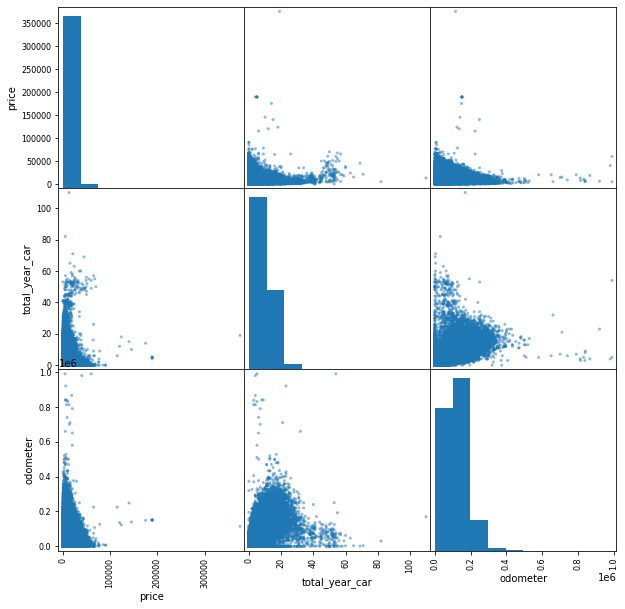

In [40]:
print(us_car_corr.corr())

pd.plotting.scatter_matrix(us_car_corr, figsize=(10,10))

In [43]:
us_car_corr2=us_car[['paint_color','transmission','price']].dropna()

In [44]:
print(us_car_corr2)

      paint_color transmission  price
0          Unknow    automatic   9400
1           white    automatic  25500
2             red    automatic   5500
3          Unknow    automatic   1500
4           black    automatic  14900
...           ...          ...    ...
51520       black    automatic   9249
51521       white    automatic   2700
51522        blue    automatic   3950
51523       black    automatic   7455
51524      Unknow    automatic   6300

[51525 rows x 3 columns]


<AxesSubplot:>

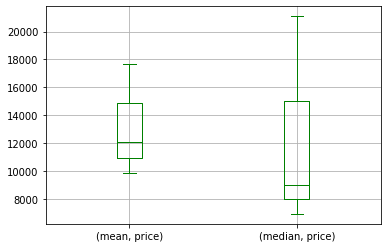

In [45]:
(us_car_corr2
     .pivot_table(index= ['transmission'], values ='price' ,aggfunc=['mean','median'])
     .boxplot(color='green')

)


<AxesSubplot:>

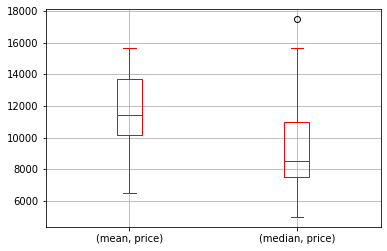

In [46]:
(us_car_corr2
     .pivot_table(index = ['paint_color'], values ='price' ,aggfunc=['mean','median'])
     .boxplot( color='red')

)

## Conclusão geral

- * Podemos verificar que o preco do carro possui pouca correlacao ao total de anos do carro e a quantidade de kilometros rodados.
- * Ja quando analisamos a idade do carro, claramente podemos notar a correlacao esperada quanto maior a idade maior sera a quantidade de kilometros rodados

- * O fator Transmissão e Cor do carro possuem semelhanças quando avaliamos a media e a mediana dos preços praticados. Porem a transmissao possuem uma variacao de precos maior, devido principalmente ao tipo de carro que possuem transmissoes maiores e precos que acompanham esse fator.